In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
import scipy.misc
%matplotlib inline

# Sample Spotify


In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.describe()

Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

In [4]:
data.head()

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


## Split data

In [6]:
train, test = train_test_split(data, test_size=0.10)

In [7]:
len(train)

1815

In [8]:
len(test)

202

In [9]:
train.shape

(1815, 17)

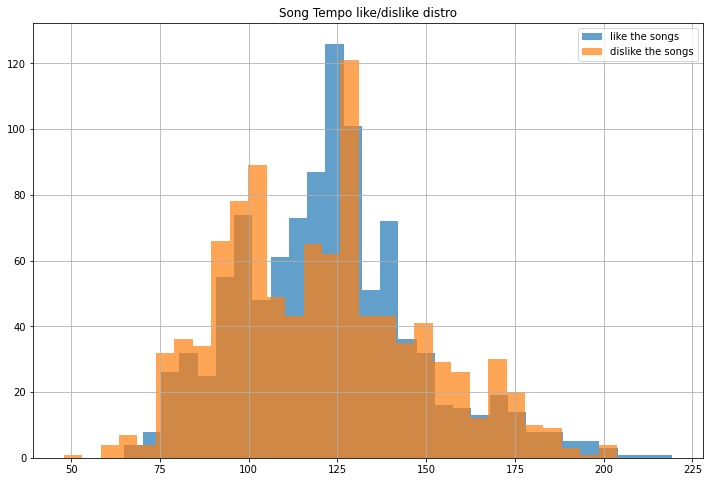

In [10]:
liked_tempo = data[data['target'] == 1]['tempo']
disliked_tempo = data[data['target'] == 0]['tempo']

figure = plt.figure(figsize=(12,8))
plt.title("Song Tempo like/dislike distro")

liked_tempo.hist(alpha=0.7, bins = 30, label="like the songs")
disliked_tempo.hist(alpha=0.7, bins = 30, label="dislike the songs")
plt.legend(loc="upper right")

In [11]:
c = DecisionTreeClassifier(min_samples_split=100)

In [12]:
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness", "duration_ms"]

In [13]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [14]:
dt = c.fit(x_train, y_train)

In [15]:

def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = scipy.misc.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)

In [16]:
# show_tree(tree=dt, features=features, path='dec_tree_01.png')

In [17]:
y_pred = c.predict(x_test)

In [18]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1])

# Getting all the matrices For Decision Tree

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score

acc_score = accuracy_score(y_test, y_pred) * 100
pres_score = precision_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity = conf_matrix[0,0]/(conf_matrix[0,0] + conf_matrix[0,1])
specificity = conf_matrix[1,1]/(conf_matrix[1,0] + conf_matrix[1,1])
classification_reports = classification_report(y_test, y_pred)

In [20]:
print('Accuracy using Decision Tree: {}%'.format(round(acc_score, 1)))
print('Precision using Decision Tree: {}%'.format(round(pres_score, 1)))
print('Recall using Decision Tree: {}%'.format(round(recall, 1)))
print('F1-Score using Decision Tree: {}%'.format(round(f1, 1)))
print('Sensitivity using Decision Tree: {}%'.format(round(sensitivity * 100, 1)))
print('Specificity using Decision Tree: {}%'.format(round(specificity * 100, 1)))
print(conf_matrix)
print(classification_reports)

Accuracy using Decision Tree: 74.8%
Precision using Decision Tree: 83.3%
Recall using Decision Tree: 63.1%
F1-Score using Decision Tree: 71.8%
Sensitivity using Decision Tree: 86.9%
Specificity using Decision Tree: 63.1%
[[86 13]
 [38 65]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        99
           1       0.83      0.63      0.72       103

    accuracy                           0.75       202
   macro avg       0.76      0.75      0.74       202
weighted avg       0.76      0.75      0.74       202



# Predict Using Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
modelNB = GaussianNB()

In [23]:
y_nb_pred = modelNB.fit(x_train, y_train)

In [24]:
y_nb_pred = y_nb_pred.predict(x_test)

In [25]:
acc_score = accuracy_score(y_test, y_nb_pred) * 100
conf_matrix = confusion_matrix(y_test, y_nb_pred)
classification_reports = classification_report(y_test, y_nb_pred)

In [26]:
print('Accuracy using Naive Bayse: {}%'.format(round(acc_score, 1)))
print(conf_matrix)
print(classification_reports)

Accuracy using Naive Bayse: 64.4%
[[80 19]
 [53 50]]
              precision    recall  f1-score   support

           0       0.60      0.81      0.69        99
           1       0.72      0.49      0.58       103

    accuracy                           0.64       202
   macro avg       0.66      0.65      0.64       202
weighted avg       0.66      0.64      0.63       202



# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LR = LogisticRegression()

In [29]:
y_lr_pred = LR.fit(x_train, y_train).predict(x_test)

In [30]:
# acc_score = accuracy_score(y_test, y_lr_pred) * 100
# conf_matrix = confusion_matrix(y_test, y_lr_pred)
# classification_reports = classification_report(y_test, y_lr_pred)

In [31]:
y_lr_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [32]:
confusion_matrix(y_test,y_lr_pred)

array([[  0,  99],
       [  0, 103]])

# Support Vector Machine

In [33]:
from sklearn import svm

In [34]:
support_vector_machine = svm.SVC()

In [35]:
svm_pred = support_vector_machine.fit(x_train, y_train).predict(x_test)

In [36]:
acc_score = accuracy_score(y_test, svm_pred) * 100
conf_matrix = confusion_matrix(y_test, svm_pred)
classification_reports = classification_report(y_test,svm_pred)

In [37]:
print('Accuracy using SVM: {}%'.format(round(acc_score, 1)))
print(conf_matrix)
print(classification_reports)

Accuracy using SVM: 54.0%
[[87 12]
 [81 22]]
              precision    recall  f1-score   support

           0       0.52      0.88      0.65        99
           1       0.65      0.21      0.32       103

    accuracy                           0.54       202
   macro avg       0.58      0.55      0.49       202
weighted avg       0.58      0.54      0.48       202



# K-nearest neighbor (KNN)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaler.fit(x_train)

x_scale_train = scaler.transform(x_train)
x_scale_test = scaler.transform(x_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
y_knn_pred = classifier.predict(x_test)

In [43]:
conf_matrix = confusion_matrix(y_test, y_knn_pred)
classification_reports = classification_report(y_test,y_knn_pred)

In [44]:
print(conf_matrix)
print(classification_reports)

[[61 38]
 [44 59]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        99
           1       0.61      0.57      0.59       103

    accuracy                           0.59       202
   macro avg       0.59      0.59      0.59       202
weighted avg       0.59      0.59      0.59       202

